In [15]:
%matplotlib inline

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd




              Happiness score  Log GDP per capita
Country name                                     
Argentina            6.404462           10.044385
Australia            7.250333           10.767200
Austria              7.215200           10.886667
Belgium              6.947867           10.812333
Belize               6.451000            9.192000


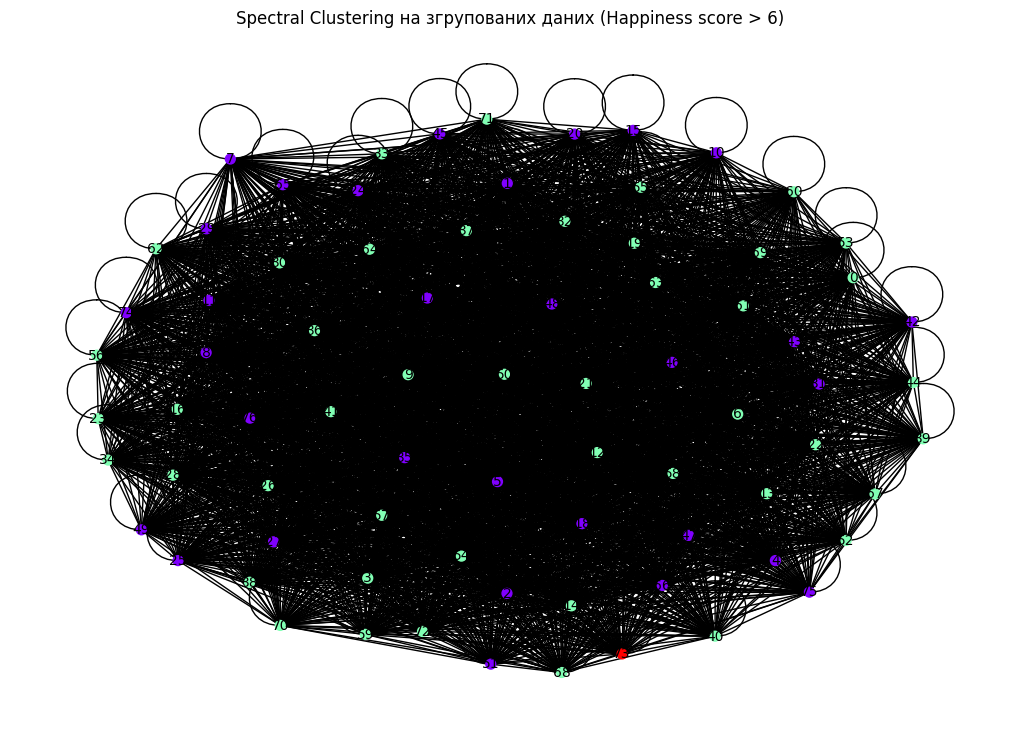

In [16]:
# Завантаження даних
whr = pd.read_csv("whr.csv").dropna()

# Вибірка країн з Happiness score > 6
filtered_data = whr[whr['Happiness score'] > 6]

# Групування по середньому значенню Happiness score та Log GDP per capita
grouped_data = filtered_data.groupby('Country name')[['Happiness score', 'Log GDP per capita']].mean()

# Визуалізація результату групування
print(grouped_data.head())

# Створення матриці схожості
X = grouped_data[['Log GDP per capita', 'Happiness score']].values
similarity_matrix = cosine_similarity(X)

# Створення графа на основі схожості
G = nx.from_numpy_array(similarity_matrix)

# Кластеризація
clustering = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
labels = clustering.fit_predict(similarity_matrix)

# Розташування вузлів
pos = nx.spring_layout(G, seed=42)

# Візуалізація графа
plt.figure(figsize=(10, 7))
nx.draw(G, pos, node_color=labels, with_labels=True, cmap=plt.cm.rainbow, node_size=50, font_size=10)
plt.title("Spectral Clustering на згрупованих даних (Happiness score > 6)")
plt.show()